In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import (user,password,host,port,database)


In [5]:
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
connection = engine.connect()

In [ ]:
query = "SELECT E.EMP_NO, LAST_NAME, FIRST_NAME, SALARY, TITLE FROM EMPLOYEES E, SALARIES S, titles t WHERE E.EMP_NO = S.EMP_NO  AND t.title_id = e.emp_title_id;"
emp_df = pd.read_sql(query, connection)

In [22]:
emp_df.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


Text(0, 0.5, 'Count of Employees')

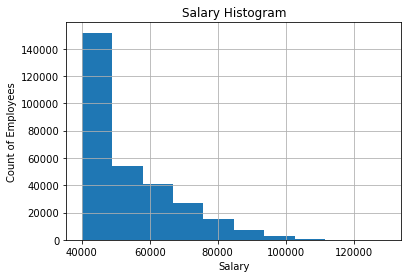

In [24]:
# Create a histogram to visualize the most common salary ranges for employees.

plot = emp_df.salary.hist()
plot.set_title("Salary Histogram")
plot.set_xlabel("Salary")
plot.set_ylabel("Count of Employees")

Analysis: I would expect a normal company's salaries to be more of a bell shape.  Unless this company has recently enacted a minimum salary for all employees at 40k (hey, it's happened. 70k: https://www.huffpost.com/entry/dan-price-minimum-wage_n_5afd3d8ee4b06a3fb50dcf28) it doesn't appear to be a normal salary distribution.

Text(0, 0.5, 'Salary')

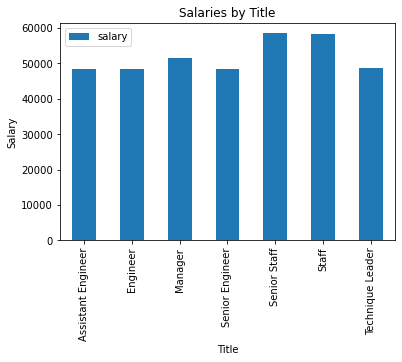

In [26]:
# Create a bar chart of average salary by title.
bar = emp_df[['title','salary']].groupby('title').mean().plot.bar()
bar.set_title("Salaries by Title")
bar.set_xlabel("Title")
bar.set_ylabel("Salary")

Analysis: This is more of a tell of fake data.  You would expect the average for Senior Engineer to be higher than Enginner, Engineer to be higher than Assistant Engineer, and Senior Staff to be higher than Staff.

The dataset doesn't provide any details on what kind of roles each title performs.   My expectation would be "Staff" includes people performing admin assistance or other clerical roles that would have a lower average salary than engineering. Without more data on how titles as assigned in this company, I can't prove or disprove this expectation.

In [ ]:
#april fools. ha.